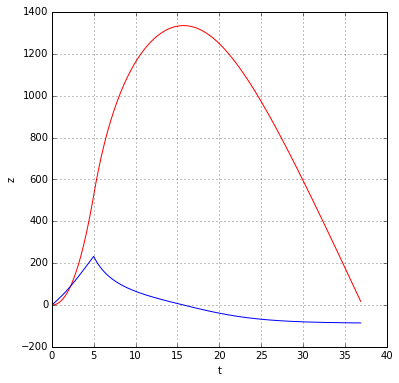

Mass of the propellant at time=3.2s is 36 kg

Maximum speed of the rocket 232.159324 m/s
Altitude at this time 523.647404 m
At time= 4.900000 s

Rocket's maximum altitude 1335.043283 m
At time = 15.600000 s
 
Time of impact 37.000000 s
Altitude = -0.041094 m
Velocity of rocket at the time of impact -85.945715 m/s


In [49]:
import numpy
import math
import matplotlib.pyplot as plt
%matplotlib inline
# inputs to the system
ms=50 # weight of the rocket shell
g = 9.8 #acceleration due to gravity
ro = 1.091
r=0.5    # Radius 
A = 3.14*r**2  # area at r = 0.5
nue = 325 # Exhaust velocity
CD=0.15 #Drag coefficent
mp0=100 # initial weight of rocket propellant
mdp=20    

Tf=40
dt=0.1
N=int(Tf/dt)
t=numpy.linspace(0,Tf,N+1)

z=numpy.zeros(N+1)
v=numpy.zeros(N+1)

z[0]=0.0
v[0]=0.0

maxvelocity=0.
maxaltitude=0.
velocity_at_dt= 0.

for n in range(0,N,1):

 z[n+1]=z[n]+dt*v[n]
 time=n*dt
 if(z[n+1]<0): 
    break
    
 mp=mp0-(mdp*time)
 if time>=5 :
  mp=0.0
  mdp=0.0

 v[n+1]=v[n]+dt*(((-(ms+mp)*g)+(mdp*nue)-(0.5*ro*v[n]*abs(v[n])*A*CD))/(mp+ms)) 

 if v[n+1]> maxvelocity :
     maxvelocity=v[n+1]
     altitudevmax=z[n+1]
     Tvmax=time
     
     
     
 if z[n+1]> maxaltitude :
    maxaltitude=z[n+1]
    vmaxaltitude=v[n+1]
    Tmaxaltitude=time
    
 if z[n+1]< maxaltitude :
    minaltitude=z[n+1]
    vminaltitude=v[n+1]
    Tminaltitude=time    
    


vground=v[n] 
tground=time

hpath=z[0:n] 
vpath=v[0:n]
t=t[0:n]

plt.figure(figsize=(6,6))
plt.grid(True)   
plt.xlabel('t', fontsize=10) #x label
plt.ylabel('z', fontsize=10) #y label
plt.plot(t,hpath, 'r-'); 
plt.plot(t,vpath, 'b-'); 
plt.show()

# To calculate mass of propellant at time = 3.2
mdp = 20
for n in range(0,N,1):
    time=n*dt
    if time==3.2 :
       mp=mp0-(mdp*time)
       print "Mass of the propellant at time=3.2s is %d kg\n" %mp

#To calculate max velocity and max altitude
print "Maximum speed of the rocket %f m/s"  %maxvelocity
print "Altitude at this time %f m" %altitudevmax
print "At time= %f s\n" %Tvmax

print "Rocket's maximum altitude %f m" %maxaltitude
print "At time = %f s\n " %Tmaxaltitude

for n in range(0,N,1):

 z[n+1]=z[n]+dt*v[n]
 time=n*dt
 if(z[n+1]<0): 
    
    print "Time of impact %f s" %time
    print "Altitude = %f m" %z[n+1]
    print "Velocity of rocket at the time of impact %f m/s" %v[n]
    break
    
